In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import mglearn
import numpy as np
import japanize_matplotlib
import numpy as np
from urllib import request
from bs4 import BeautifulSoup
import re
# from pathlib import Path
# BASE_DIR = Path(__file__).resolve().parent.parent.parent

shiller_url = "https://www.multpl.com/shiller-pe"
per_url = 'https://www.multpl.com/s-p-500-pe-ratio'

# 何年後を計算するか指定
afteryears = 5 

In [2]:
def get_per(url):
    # shiller-perのスクレイピング
    # html取得
    response = request.urlopen(url)
    content = response.read()
    response.close()
    html = content.decode()
    #print(html)

    # htmlから要素を抽出
    soup = BeautifulSoup(html)
    current_item = soup.find('div', id='current')
    current_item=current_item.get_text()

    # 正規表現で抽出
    p = re.compile('\d+\.\d+')
    shiller_per_value = float(p.search(current_item).group())
    return shiller_per_value

In [3]:
get_per(shiller_url)

39.22

,DateTime_x,S&P 500,Month,DateTime_y,PE Ratio,DateTime,Shiller PE Ratio
0,1871-01-01,4.44,187101,1871-01-01 00:00:59,11.10,NaT,NaN
1,1871-02-01,4.50,187102,1871-02-01 00:00:59,11.25,1871-02-01,10.92
2,1871-03-01,4.61,187103,1871-03-01 00:00:59,11.52,1871-03-01,11.19
3,1871-04-01,4.74,187104,1871-04-01 00:00:59,11.85,1871-04-01,12.05
4,1871-05-01,4.86,187105,1871-05-01 00:00:59,12.15,1871-05-01,12.59
...,...,...,...,...,...,...,...
1820,2021-06-01,4238.49,202106,2021-06-01 00:00:00,33.06,2021-06-01,36.86
1821,2021-07-01,4358.13,202107,2021-07-01 00:00:00,33.99,2021-07-01,37.68
1822,2021-08-01,4450.37,202108,2021-08-31 00:00:00,35.28,2021-08-01,38.44
1823,2021-08-01,4450.37,202108,2021-08-01 00:00:00,34.71,2021-08-01,38.44


,DateTime_x,S&P 500,Month,DateTime_y,PE Ratio,DateTime,Shiller PE Ratio,afteryears,afteryearsReturn
0,1980-02-01,115.30,198002,1980-02-01,7.61,1980-02-01,9.05,180.90,1.568951
1,1980-03-01,104.70,198003,1980-03-01,6.85,1980-03-01,8.08,179.40,1.713467
2,1980-04-01,103.00,198004,1980-04-01,6.79,1980-04-01,7.84,180.60,1.753398
3,1980-05-01,107.70,198005,1980-05-01,7.15,1980-05-01,8.10,184.90,1.716806
4,1980-06-01,114.60,198006,1980-06-01,7.67,1980-06-01,8.51,188.90,1.648342
...,...,...,...,...,...,...,...,...,...
435,2016-05-01,2065.55,201605,2016-05-01,23.81,2016-05-01,25.69,4167.85,2.017792
436,2016-06-01,2083.89,201606,2016-06-01,23.97,2016-06-01,25.84,4238.49,2.033932
437,2016-07-01,2148.90,201607,2016-07-01,24.52,2016-07-01,26.69,4358.13,2.028075
438,2016-08-01,2170.95,201608,2016-08-01,24.57,2016-08-01,26.95,4450.37,2.049964


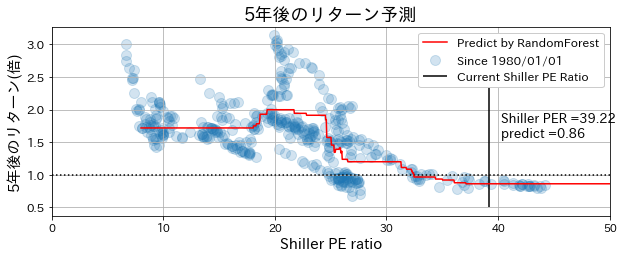

In [4]:
# データ読み込み
df=pd.read_excel('C:/Users/nakam/Dropbox/資産/Django/data/S and P PE Ratio.xlsx')
df1=pd.read_excel('C:/Users/nakam/Dropbox/資産/Django/data/S and P PE Ratio.xlsx', sheet_name='Shiller PE Ratio')
df2=pd.read_excel('C:/Users/nakam/Dropbox/資産/Django/data/S and P PE Ratio.xlsx', sheet_name='Stock Price')

# monthの作成
df1['DateTime'] = pd.to_datetime(df1['DateTime'])
df1['Month']=df1['DateTime'].dt.strftime('%Y%m')

df2['DateTime'] = pd.to_datetime(df2['DateTime'])
df2['Month']=df2['DateTime'].dt.strftime('%Y%m')

df = df.iloc[:,:2]
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['Month']=df['DateTime'].dt.strftime('%Y%m')

# 結合
df3=pd.merge(df2,df,how='left',on='Month')
df3=pd.merge(df3,df1,how='left',on='Month')
df3=df3.sort_values('DateTime_x')
df3=df3.reset_index(drop=True)
display(df3)

# 数年後のリターンを計算
df3['afteryears']=0
for i in range(len(df3)):
    now_month = df3.loc[i, 'Month']
    after_month = str(int(now_month)+afteryears*100)
    # print(now_month,"⇒",after_month)

    try :
        # print(df3[df3['Month']==after_month]['S&P 500'].values[0])
        df3.loc[i,"afteryears"] = df3[df3['Month']==after_month]['S&P 500'].values[0]
    except IndexError:
        continue

# 数年後リターンの計算
df3['afteryearsReturn'] = df3['afteryears'] / df3["S&P 500"]

# リターンが0以外のもののみ抽出
df4=df3[df3['afteryearsReturn']!=0]
df4=df4[df4['DateTime_x']>pd.to_datetime('1980-01-01')]
df4=df4.reset_index(drop=True)
display(df4)

# 学習用データの作成
x_train = df4['Shiller PE Ratio'].values
y_train = df4['afteryearsReturn'].values
x_train = x_train.reshape(-1,1)

# # GridSearchでパラメータ決定
# param_grid = {'n_estimators': [1,2,3,4,5,6,7,8,9,10], 'max_depth': [1,2,3,4,5,6,7,8,9,10]}
# grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, verbose = 2)
# grid_search.fit(x_train,y_train)

# # ヒートマップの作成
# results = pd.DataFrame(grid_search.cv_results_)
# scores = np.array(results.mean_test_score).reshape(10, 10)
# mglearn.tools.heatmap(scores, xlabel='n_estimators', xticklabels=param_grid['n_estimators'],
#                   ylabel='max_depth', yticklabels=param_grid['max_depth'], cmap="viridis", fmt='%0.1f')
# plt.show()
    
# ランダムフォレストによる予測
rfr = RandomForestRegressor(n_estimators=8,max_depth = 3, random_state=5)
rfr.fit(x_train,y_train)
x_test = np.linspace(8,50,1000).reshape(-1,1)
predict = rfr.predict(x_test)

# 現在のPerを計算に使用する
shiller_per_value = get_per(shiller_url)
now_value=np.array(shiller_per_value).reshape(-1,1)
estimate=rfr.predict(now_value)

# グラフ化
plt.rcParams["legend.framealpha"] = 1
plt.rcParams['figure.subplot.bottom'] = 0.15
plt.rcParams['figure.subplot.top'] = 0.90
plt.figure(figsize=(10,3.5))

plt.scatter(df4['Shiller PE Ratio'],df4['afteryearsReturn'],s=100,alpha=0.2, label='Since 1980/01/01')
plt.vlines([shiller_per_value],0.5,df4['afteryearsReturn'].max(),color='black', label='Current Shiller PE Ratio')
plt.hlines([1],0,50,color='black',linestyles='dotted')
plt.plot(x_test[:,0],predict,c='r',label='Predict by RandomForest')
plt.text(now_value+1,df4['afteryearsReturn'].max()/2,'Shiller PER =' + str(shiller_per_value) +'\npredict ='+str(round(estimate[0],2)),fontsize=13)
plt.xlim([0,50])
plt.legend(fontsize=12)
plt.title('{}年後のリターン予測'.format(afteryears),fontsize=18)
plt.xlabel('Shiller PE ratio',fontsize=15)
plt.ylabel('{}年後のリターン(倍)'.format(afteryears),fontsize=15)
plt.xticks(fontsize=11)
plt.yticks(fontsize=12)
plt.grid()
#plt.savefig(str(BASE_DIR)+'/static/images/shiller_per_predict.png')
plt.show()

,DateTime_x,S&P 500,Month,DateTime_y,PE Ratio_x,DateTime,PE Ratio_y,Unnamed: 2,https://www.longtermtrends.net/sp500-price-earnings-shiller-pe-ratio/,afteryears,afteryearsReturn
0,1980-02-01,115.30,198002,1980-02-01,7.61,1980-02-01,7.61,NaN,NaN,180.90,1.568951
1,1980-03-01,104.70,198003,1980-03-01,6.85,1980-03-01,6.85,NaN,NaN,179.40,1.713467
2,1980-04-01,103.00,198004,1980-04-01,6.79,1980-04-01,6.79,NaN,NaN,180.60,1.753398
3,1980-05-01,107.70,198005,1980-05-01,7.15,1980-05-01,7.15,NaN,NaN,184.90,1.716806
4,1980-06-01,114.60,198006,1980-06-01,7.67,1980-06-01,7.67,NaN,NaN,188.90,1.648342
...,...,...,...,...,...,...,...,...,...,...,...
435,2016-05-01,2065.55,201605,2016-05-01,23.81,2016-05-01,23.81,NaN,NaN,4167.85,2.017792
436,2016-06-01,2083.89,201606,2016-06-01,23.97,2016-06-01,23.97,NaN,NaN,4238.49,2.033932
437,2016-07-01,2148.90,201607,2016-07-01,24.52,2016-07-01,24.52,NaN,NaN,4358.13,2.028075
438,2016-08-01,2170.95,201608,2016-08-01,24.57,2016-08-01,24.57,NaN,NaN,4450.37,2.049964


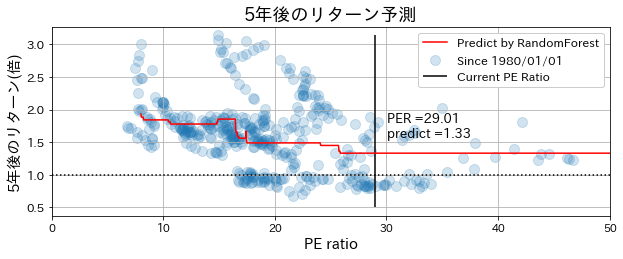

In [5]:
# データ読み込み
df=pd.read_excel('C:/Users/nakam/Dropbox/資産/Django/data/S and P PE Ratio.xlsx')
df1=pd.read_excel('C:/Users/nakam/Dropbox/資産/Django/data/S and P PE Ratio.xlsx', sheet_name='PE Ratio')
df2=pd.read_excel('C:/Users/nakam/Dropbox/資産/Django/data/S and P PE Ratio.xlsx', sheet_name='Stock Price')

# monthの作成
df1['DateTime'] = pd.to_datetime(df1['DateTime'])
df1['Month']=df1['DateTime'].dt.strftime('%Y%m')

df2['DateTime'] = pd.to_datetime(df2['DateTime'])
df2['Month']=df2['DateTime'].dt.strftime('%Y%m')

df = df.iloc[:,:2]
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['Month']=df['DateTime'].dt.strftime('%Y%m')

# 結合
df3=pd.merge(df2,df,how='left',on='Month')
df3=pd.merge(df3,df1,how='left',on='Month')
df3=df3.sort_values('DateTime_x')
df3=df3.reset_index(drop=True)

# 5年後のリターンを計算
df3['afteryears']=0
for i in range(len(df3)):
    now_month = df3.loc[i, 'Month']
    after_month = str(int(now_month)+afteryears*100)
    # print(now_month,"⇒",after_month)

    try :
        # print(df3[df3['Month']==after_month]['S&P 500'].values[0])
        df3.loc[i,"afteryears"] = df3[df3['Month']==after_month]['S&P 500'].values[0]
    except IndexError:
        continue

# 数年後リターンの計算
df3['afteryearsReturn'] = df3['afteryears'] / df3["S&P 500"]

# リターンが0以外のもののみ抽出
df4=df3[df3['afteryearsReturn']!=0]
df4=df4[df4['DateTime_x']>pd.to_datetime('1980-01-01')]
df4=df4.reset_index(drop=True)
display(df4)

# 学習用データの作成
x_train = df4['PE Ratio_x'].values
y_train = df4['afteryearsReturn'].values
x_train = x_train.reshape(-1,1)

#     # GridSearchでパラメータ決定
#     param_grid = {'n_estimators': [1,2,3,4,5,6,7,8,9,10], 'max_depth': [1,2,3,4,5,6,7,8,9,10]}
#     grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, verbose = 2)
#     grid_search.fit(x_train,y_train)

#     # ヒートマップの作成
#     results = pd.DataFrame(grid_search.cv_results_)
#     scores = np.array(results.mean_test_score).reshape(10, 10)
#     mglearn.tools.heatmap(scores, xlabel='n_estimators', xticklabels=param_grid['n_estimators'],
#                       ylabel='max_depth', yticklabels=param_grid['max_depth'], cmap="viridis", fmt='%0.1f')
#     plt.show()

# ランダムフォレストによる予測
rfr = RandomForestRegressor(n_estimators=10,max_depth = 2, random_state=5)
rfr.fit(x_train,y_train)
x_test = np.linspace(8,50,1000).reshape(-1,1)
predict = rfr.predict(x_test)

# 現在のPerを計算に使用する
per_value = get_per(per_url)
now_value = np.array(per_value).reshape(-1,1)
estimate = rfr.predict(now_value)

# グラフ化
plt.rcParams["legend.framealpha"] = 1
plt.rcParams['figure.subplot.bottom'] = 0.15
plt.rcParams['figure.subplot.top'] = 0.90
plt.figure(figsize=(10,3.5))


plt.scatter(df4['PE Ratio_x'],df4['afteryearsReturn'],s=100,alpha=0.2, label='Since 1980/01/01')
plt.vlines([per_value],0.5,df4['afteryearsReturn'].max(),color='black', label='Current PE Ratio')
plt.hlines([1],0,50,color='black',linestyles='dotted')
plt.plot(x_test[:,0],predict,c='r',label='Predict by RandomForest')
plt.text(now_value+1,df4['afteryearsReturn'].max()/2,'PER =' + str(per_value) +'\npredict ='+str(round(estimate[0],2)),fontsize=13)
plt.xlim([0,50])
plt.legend(fontsize=12)
plt.title('{}年後のリターン予測'.format(afteryears),fontsize=18)
plt.xlabel('PE ratio',fontsize=15)
plt.ylabel('{}年後のリターン(倍)'.format(afteryears),fontsize=15)
plt.xticks(fontsize=11)
plt.yticks(fontsize=12)
plt.grid()
# plt.savefig(str(BASE_DIR)+'/static/images/per_predict.png')
plt.show()